In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

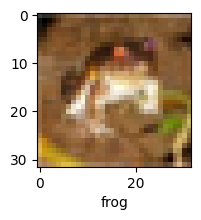

In [55]:
plot_sample(X_train, y_train, 0)

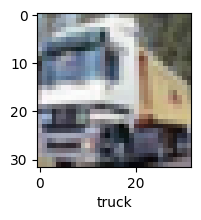

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8127 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6252 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5438 - accuracy: 0.4539
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4846 - accuracy: 0.4755
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4346 - accuracy: 0.4963


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.37      0.48      1000
           1       0.77      0.29      0.42      1000
           2       0.26      0.63      0.36      1000
           3       0.39      0.25      0.30      1000
           4       0.47      0.30      0.37      1000
           5       0.44      0.33      0.38      1000
           6       0.53      0.48      0.51      1000
           7       0.52      0.58      0.55      1000
           8       0.57      0.68      0.62      1000
           9       0.48      0.65      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.4750 - accuracy: 0.4677
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1127 - accuracy: 0.6089
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9899 - accuracy: 0.6547
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9028 - accuracy: 0.6885
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8419 - accuracy: 0.7085
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7850 - accuracy: 0.7273
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7434 - accuracy: 0.7394
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7007 - accuracy: 0.7556
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6579 - accuracy: 0.7706
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.62

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8963 - accuracy: 0.7022


[0.8962852358818054, 0.7021999955177307]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[8.8725623e-04, 6.3689461e-04, 3.2639600e-05, 9.7685027e-01,
        1.0611048e-03, 9.7691314e-03, 1.0029753e-03, 3.4294753e-05,
        8.9645991e-03, 7.6087803e-04],
       [9.9877208e-05, 7.6611713e-04, 2.4138806e-06, 8.5849541e-09,
        3.0165708e-08, 1.6579223e-10, 1.0369917e-08, 1.7712674e-09,
        9.9913138e-01, 2.2131977e-07],
       [5.5207815e-02, 5.4654229e-02, 1.3002519e-03, 1.0355673e-03,
        1.2928422e-04, 7.8582008e-05, 2.4476135e-04, 3.6237550e-05,
        8.8162339e-01, 5.6898650e-03],
       [3.0478552e-01, 1.1509273e-02, 2.9012924e-03, 1.3938046e-04,
        6.4216689e-03, 9.8797891e-06, 5.1082001e-04, 8.2343277e-06,
        6.7306215e-01, 6.5175624e-04],
       [1.8391783e-06, 3.6891261e-06, 8.3849821e-03, 2.7064476e-02,
        5.4522091e-01, 2.4320141e-03, 4.1682702e-01, 3.4037410e-05,
        1.7305969e-05, 1.3782385e-05]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

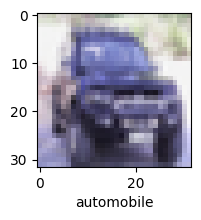

In [57]:
plot_sample(X_test, y_test,9)

In [56]:
classes[y_classes[9]]

'automobile'

In [58]:
classes[y_classes[9]]

'automobile'